In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
from pycytominer.cyto_utils import infer_cp_features
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds
from utils import eval

In [2]:
res_base_enr = pd.read_csv("../plot_storage/baseline_calc_sph_enr.csv")
res_base_pre = pd.read_csv("../plot_storage/baseline_calc_sph_pre.csv")
res_base_hit = pd.read_csv("../plot_storage/baseline_calc_sph_hit.csv")
sph_pre_r = 0.06703344559051595

In [3]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/813/813_aggregated_median.csv')
name = 'train'
e = eval.evaluation(df)
df = e.norm_agg()
exec(name + "_pre = eval.prec_mean(e.eval(df, operation = 'precision_recall'))")
exec(name + "_pre_r = e.eval(df, operation = 'precision_recall', eval_range='R').precision.mean()")
exec(name + "_hit = eval.hitk_prep(e.eval(df, operation = 'hitk'))")
exec(name + "_enr = e.eval(df, operation = 'enrichment')")

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1280 features were identified


In [4]:
# df = pd.read_csv('../pre_trained/aggregated_efficientnet_median.csv')
# name = 'pretrain'
# e = eval.evaluation(df)
# df = e.norm_agg()
# exec(name + "_pre = eval.prec_mean(e.eval(df, operation = 'precision_recall'))")
# exec(name + "_pre_r = e.eval(df, operation = 'precision_recall', eval_range='R').precision.mean()")
# exec(name + "_hit = eval.hitk_prep(e.eval(df, operation = 'hitk'))")
# exec(name + "_enr = e.eval(df, operation = 'enrichment')")

In [5]:
pre_enr = pd.read_csv("../plot_storage/pre_tr_eff_enr.csv")
pre_prec = pd.read_csv("../plot_storage/pre_tr_eff_pre.csv")
pre_hit = pd.read_csv("../plot_storage/pre_tr_eff_hit.csv")

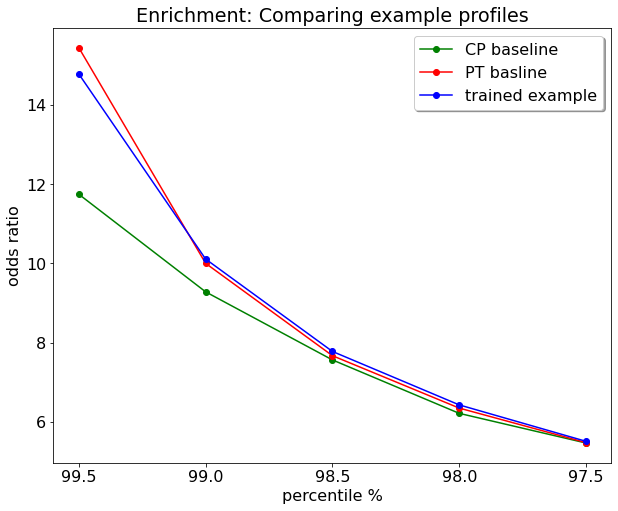

In [21]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Enrichment: Comparing metrics")
plt.plot(100*res_base_enr["enrichment_percentile"][:5], res_base_enr["ods_ratio"][:5], marker="o", color="g", label = 'CP baseline')
plt.plot(100*pre_enr["enrichment_percentile"][:5], pre_enr["ods_ratio"][:5], marker="o", color="r", label = 'PT basline')
plt.plot(100*train_enr["enrichment_percentile"][:5], train_enr["ods_ratio"][:5], marker="o", color="b", label = 'trained example')
plt.ylabel('odds ratio')
plt.xlabel('percentile %')
ax.invert_xaxis()
plt.xticks(np.arange(99.5, 97, -0.5))
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [ ]:
np.arange(100, 95, -1)

In [ ]:
one = res_base_pre
two = pretrain_pre
three = train_pre
print(f"P@R base: {sph_pre_r}")
print(f"P@R pretraomed: {pretrain_pre_r}")
print(f"P@R trained: {train_pre_r}")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision and recall @k")
plt.plot(one["k"], one["precision"], marker="o", color="green", label = 'base')
plt.plot(one["k"], one["recall"], marker="o", color="g")
plt.plot(two["k"], two["precision"], marker="o", color="r", label = 'pretrained')
plt.plot(two["k"], two["recall"], marker="o", color="red")
plt.plot(three["k"], three["precision"], marker="o", color="b", label = 'trained')
plt.plot(three["k"], three["recall"], marker="o", color="b")
plt.ylabel('average precision and recall')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

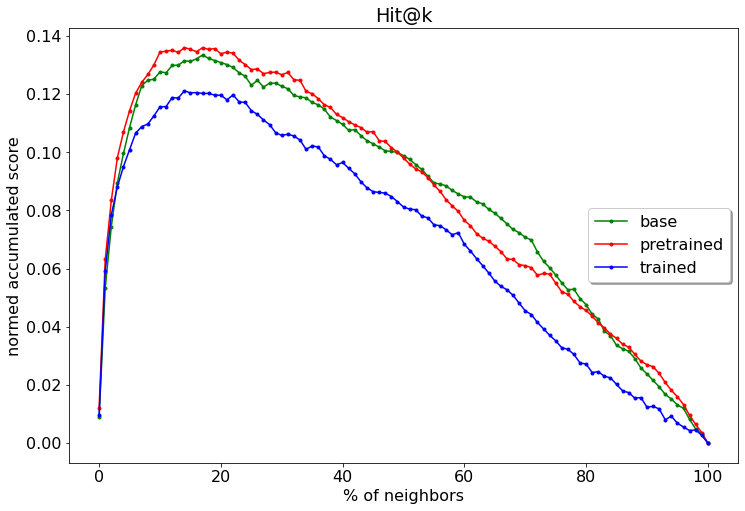

In [38]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Hit@k")
plt.plot(res_base_hit['0'], marker=".", color="g", label = 'base')
plt.plot(pre_hit['0'], marker=".", color="r", label = 'pretrained')
plt.plot(train_hit, marker=".", color="b", label = 'trained')
plt.ylabel('normed accumulated score')
plt.xlabel('% of neighbors')
plt.legend(loc = 'center right', shadow=True)
plt.show()

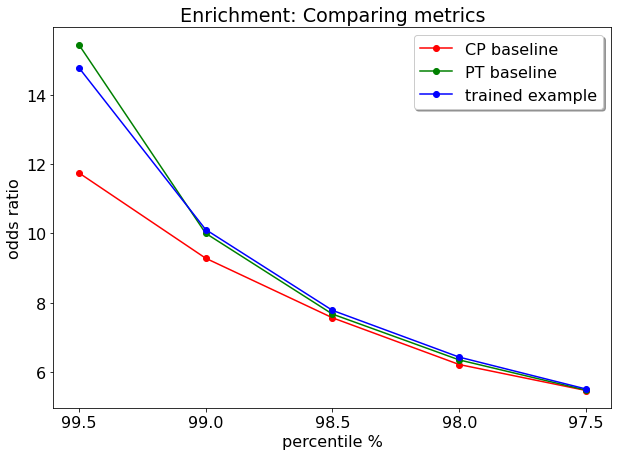

In [15]:
eval.plotting.enrichment('Enrichment: Comparing metrics', index1=res_base_enr, label_1="CP baseline", index2=pre_enr, label_2="PT baseline", index3=train_enr, label_3="trained example")

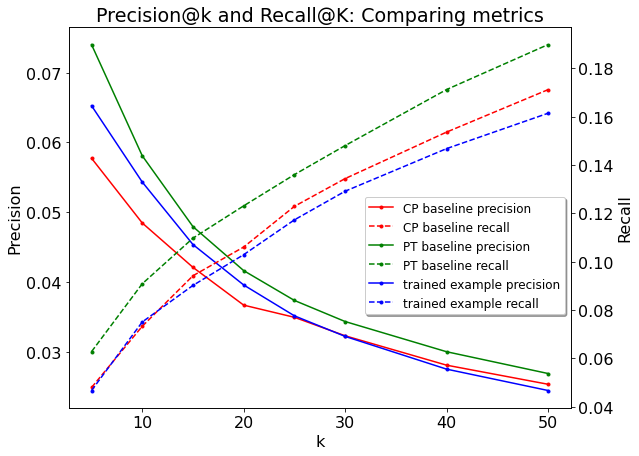

In [16]:
eval.plotting.prec_recall('Precision@k and Recall@K: Comparing metrics', fontsize= 12, index1=res_base_pre, label_1="CP baseline", index2=pre_prec, label_2="PT baseline", index3=train_pre, label_3="trained example")

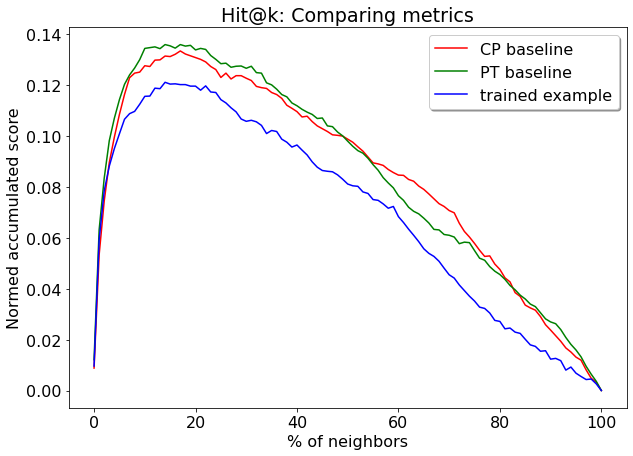

In [17]:
eval.plotting.hitk('Hit@k: Comparing metrics',  index1=res_base_hit['0'], label_1="CP baseline", index2=pre_hit['0'], label_2="PT baseline", index3=train_hit, label_3="trained example")

In [12]:
train_enr



,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.409413,14.786610,0.0
1,0.990,0.322445,10.111008,0.0
2,0.985,0.271454,7.776799,0.0
3,0.980,0.234997,6.426490,0.0
4,0.975,0.207857,5.506049,0.0
5,0.970,0.185757,4.910864,0.0
6,0.965,0.168152,4.413697,0.0
7,0.960,0.153741,4.091872,0.0


In [11]:
pre_enr


,Unnamed: 0,enrichment_percentile,threshold,ods_ratio,p-value
0,0,0.995,0.374790,15.450705,0.0
1,1,0.990,0.288042,10.003044,0.0
2,2,0.985,0.238739,7.669475,0.0
3,3,0.980,0.202480,6.345934,0.0
4,4,0.975,0.176140,5.473753,0.0
5,5,0.970,0.156268,4.865758,0.0
6,6,0.965,0.140551,4.538520,0.0
7,7,0.960,0.127897,4.167504,0.0
